# Introduction
This notebook presents an exploratory analysis of a chat history. It demonstrates how to load and clean the data, extract useful information, and visualize the results in a fun and aesthetic manner. The analysis includes the frequency of messages over time, the most active users, and a sentiment analysis of the messages. The methods used here can be applied to any chat history.

In [ ]:
!pip install emoji
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install statsmodels
!pip install textblob
!pip install wordcloud
!pip install palettable
!pip install stop-words
!pip install nltk
import nltk
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/356.6 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 23.1 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... -

 \ done


 \

 |

 /

 done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=32872538c8a19b449d5b46989bf5de236d8fca00f7ae0ec3c08120e41755d673
  Stored in directory: /home/noteable/.cache/pip/wheels/a9/25/66/ae46b49b24c976a140abb666a8d84a74062c65cc4de5f78c57
Successfully built emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/636.8 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 28.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.5 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 62.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 32.9 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 20.6 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... -

 done


 \

 |

 /

 done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32897 sha256=02d33258ddc2513c147a7d79491a89fd5abf3c80b51a6aa9de200711c3f6fae5
  Stored in directory: /home/noteable/.cache/pip/wheels/da/d8/66/395317506a23a9d1d7de433ad6a7d9e6e16aab48cf028a0f60
Successfully built stop-words


[nltk_data] Downloading package punkt to /home/noteable/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Data Loading & Cleaning
We start by loading the chat data from the `_chat.txt` file and then split to columns using re. 

Empty or N/A columns and rows are then dropped, datetime is processed, and system messages are removed.

In [ ]:
import pandas as pd
import re

# Import the data as if it were a csv
chat_data = pd.read_csv('_chat.txt', sep='	', header=None)
chat_data.head()

# Define a function to process the text file to a datafram
def split_chat_line(line):
    match = re.match(r'\[(.*?)\] (.*?): (.*)', line)
    if match:
        return match.groups()
    else:
        return None, None, line

chat_data[['datetime', 'user', 'message']] = chat_data[0].apply(split_chat_line).apply(pd.Series)
chat_data['datetime'] = pd.to_datetime(chat_data['datetime'], format='%d/%m/%Y, %I:%M:%S %p')
chat_data = chat_data.drop(columns=[0])

# Drop any rows with missing values
chat_data.dropna(inplace=True)

# Remove group name from user names
first_user = chat_data['user'].iloc[0]
chat_data = chat_data[chat_data['user'] != first_user]

chat_data.head()

# Exploratory Analysis
The exploratory analysis includes several visualizations. The number of messages over time is plotted as a line graph, showing how the activity in the chat has changed. 

The number of messages by each user is plotted as a bar graph, showing who the most active users are. Message length by user and time of day are also analysed.

Emoji frequencies are plotted using the emoji library.


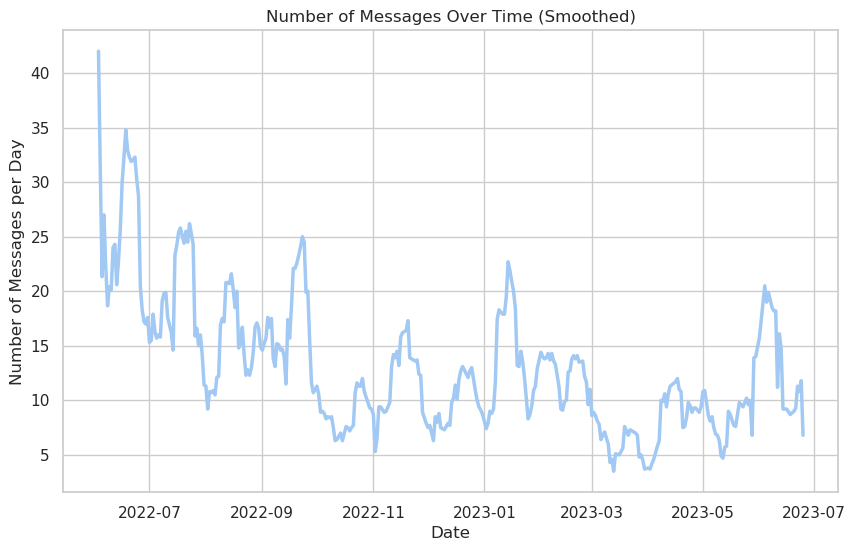

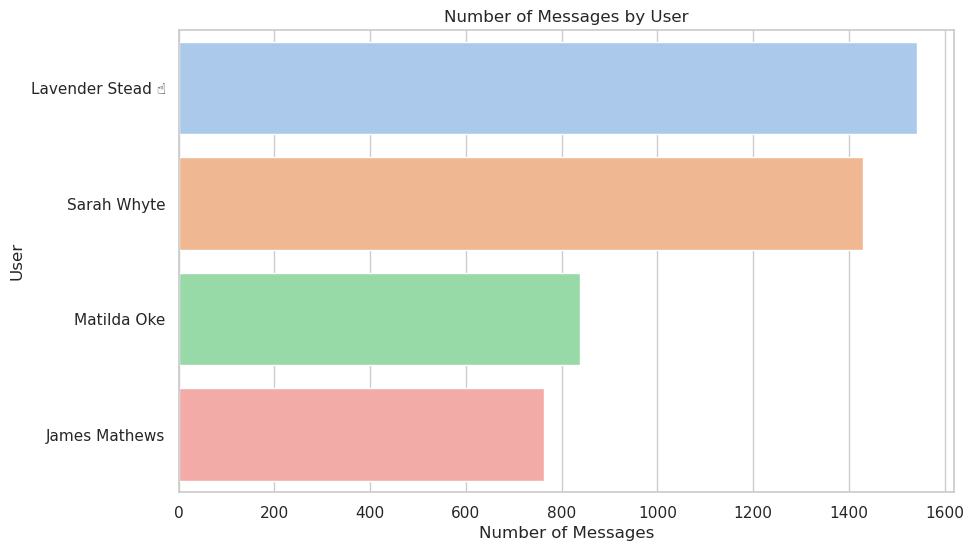

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

chat_data['date'] = chat_data['datetime'].dt.date
message_counts = chat_data['date'].value_counts().sort_index()
user_message_counts = chat_data['user'].value_counts()

sns.set(style='whitegrid', palette='pastel')

# Apply a simple moving average (rolling mean) to the message_counts data
window_size = 10  # Adjust the window size as per your preference
smoothed_message_counts = message_counts.rolling(window=window_size, min_periods=1).mean()

# Draw number of messages over time with a slightly smoothed line
plt.figure(figsize=(10, 6))
sns.lineplot(x=smoothed_message_counts.index, y=smoothed_message_counts.values, linewidth=2.5)
plt.title('Number of Messages Over Time (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Number of Messages per Day')
plt.show()

# Draw the number of messages by user
plt.figure(figsize=(10, 6))
sns.barplot(x=user_message_counts.values, y=user_message_counts.index)
plt.title('Number of Messages by User')
plt.xlabel('Number of Messages')
plt.ylabel('User')
plt.show()


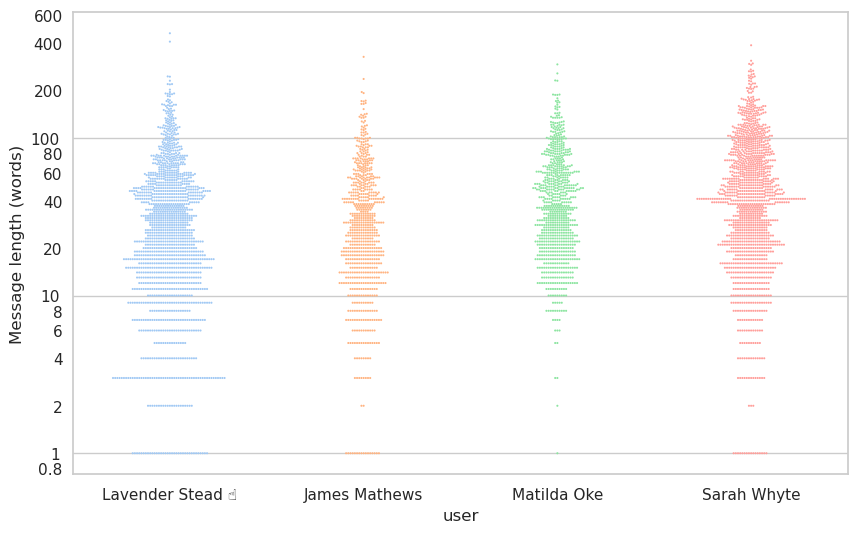

In [ ]:
import matplotlib.ticker as ticker

# Create a new column for the length of each message
chat_data['Message length (words)'] = chat_data['message'].apply(len)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add a swarmplot of message length
sns.swarmplot(x='user', y='Message length (words)', data=chat_data, hue='user', size=1.5, ax=ax, palette='pastel')

# Set the y-axis to a logarithmic scale
ax.set_yscale('log')

# Change the y-axis tick labels to display as integer values
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax.yaxis.set_minor_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

# Set the major and minor tick locations
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks = 10))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8)))

# Remove the legend
ax.get_legend().remove()

# Save the figure to a variable
swarm_plot_fig = fig


In [ ]:
import emoji

# Extract all emojis from the messages
def extract_emojis(s):
    emojis = emoji.distinct_emoji_list(s)
    return ''.join(emojis)

chat_data['emojis'] = chat_data['message'].apply(extract_emojis)

# Count the frequency of each emoji
emoji_counts = chat_data['emojis'].value_counts().head(11)

# Remove blank from emoji counts
emoji_counts = emoji_counts[emoji_counts.index != '']

emoji_counts


In [ ]:
import plotly.graph_objects as go

# Create a DataFrame for the top 10 emojis
emoji_df = emoji_counts.reset_index()
emoji_df.columns = ['emoji', 'count']

# Create a bar plot with pastel-colored bars
fig = go.Figure()

# Add the visible bars with pastel color
fig.add_trace(go.Bar(x=emoji_df['emoji'], y=emoji_df['count'], marker_color='#87CEEB'))

# Add the text annotations with emojis
for i, row in emoji_df.iterrows():
    fig.add_annotation(x=row['emoji'], y=row['count'], text=row['emoji'], font={'size': 40},
                       showarrow=False, align='center', yshift=10)

# Set the title and layout
fig.update_layout(title='Frequency of Top 10 Emojis', plot_bgcolor='white')

# Update x-axis and hide labels
fig.update_xaxes(showticklabels=False)

# Show the plot
fig.show()


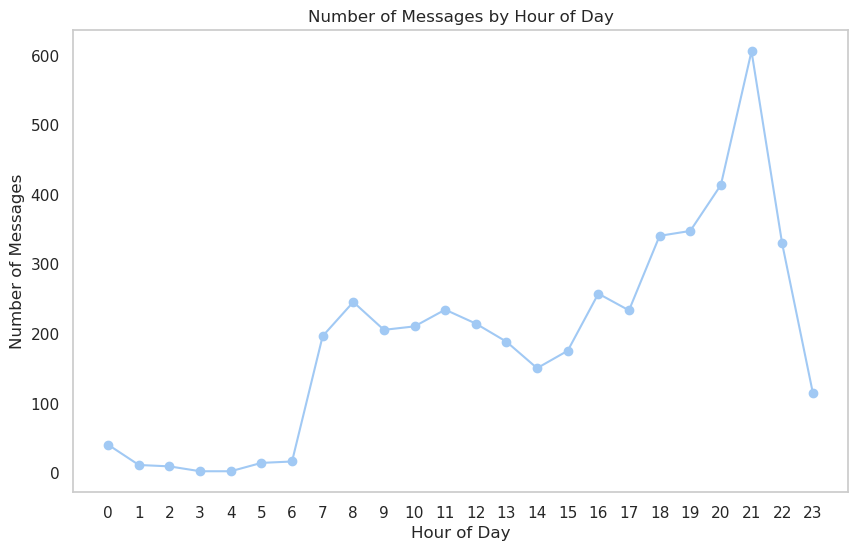

In [ ]:
# Time of day analysis
chat_data['hour'] = chat_data['datetime'].dt.hour

# Group by hour and count the number of messages
hourly_counts = chat_data.groupby('hour')['message'].count()

# Plot the hourly message counts
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.xticks(range(24), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
plt.title('Number of Messages by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Messages')
plt.grid()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Time of day analysis
chat_data['hour'] = chat_data['datetime'].dt.hour

# Group by hour and count the number of messages
hourly_counts = chat_data.groupby('hour')['message'].count()

# Define the emoji labels for each hour
emoji_labels = ['🌙', '1', '2', '3', '4', '5', '🌅', '7', '8', '9', '10', '11', '🌞', '13', '14', '15', '16', '17', '🌆', '19', '20', '21', '22', '23']

# Create a circular plot with emojis
fig = go.Figure(go.Scatterpolar(
    r=hourly_counts.values,
    theta=[f'hour {hour}' for hour in hourly_counts.index],
    mode='lines+markers',
    fill='toself',
    line_color='#87CEEB',
    marker=dict(
        color='#87CEEB',
        size=5,
        symbol='circle',
        opacity=0.8
    ),
    hovertemplate='%{theta}: %{r} messages<br>%{text}',
    text=emoji_labels
))

# Set the layout and theme
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=False),
        angularaxis=dict(
            direction='clockwise',
            showticklabels=True,
            tickvals=[f'hour {hour}' for hour in hourly_counts.index],
            ticktext=emoji_labels,
            tickfont=dict(size=14),
            tickangle=90,
            ticks=''
        )
    ),
    showlegend=False,
    plot_bgcolor='white'
)

# Show the plot
fig.show()


## Text analysis
A sentiment analysis is performed on the messages, using the TextBlob library to calculate the polarity (positive or negative sentiment) of each message. 

NLTK is then used to clean text and calculate word frequencies for a wordcloud plot using the WordCloud library.

In [ ]:
# Perform sentiment analysis per user
from textblob import TextBlob
import plotly.express as px

# Function to get the polarity of a text
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the 'message' column
chat_data['polarity'] =chat_data['message'].apply(get_polarity)

# Group by user and calculate the mean polarity
user_sentiment = chat_data.groupby('user')['polarity']
user_sentiment

import plotly.graph_objects as go

# Define a pastel color palette
pastel_colors = ['#C3E6F8', '#F8E7C3', '#C3F8CB', '#FBB6CE']

fig = go.Figure()

# Iterate over each user and create a box plot
for i, user in enumerate(chat_data['user'].unique()):
    user_data = chat_data[chat_data['user'] == user]
    fig.add_trace(go.Box(y=user_data['polarity'], name=user, marker_color=pastel_colors[i % len(pastel_colors)]))

# Add a dotted zero line
fig.add_shape(type='line', x0=-0.5, y0=0, x1=len(chat_data['user'].unique()) - 0.5, y1=0, line=dict(color='black', dash='dot'))

# Update the layout
fig.update_layout(
    title='Sentiment Analysis by User',
    yaxis_title='Polarity',
    xaxis_title='User',
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Show the plot
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Create a pivot table for sentiment analysis
pivot_table = chat_data.pivot_table(values='polarity', index='hour', columns='user', aggfunc=np.mean)

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=pivot_table.index,
    colorscale='RdBu',
    zmin=-1,
    zmax=1
))

# Update the layout
fig.update_layout(
    title='Sentiment Analysis by User and Hour of Day',
    xaxis_title='User',
    yaxis_title='Hour of Day',
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Show the plot
fig.show()


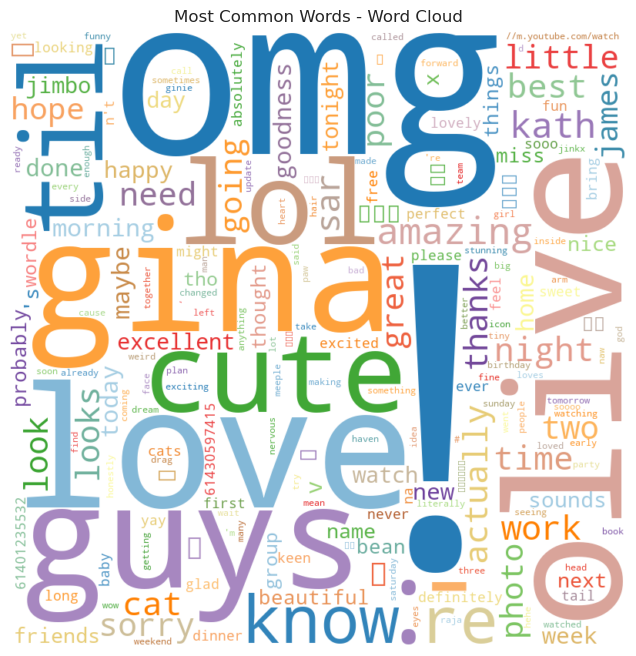

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
from palettable.colorbrewer.qualitative import Paired_12
from stop_words import get_stop_words
import nltk
from nltk.tokenize import word_tokenize

# Function to get the most common words in a text
def get_common_words(text, n=10):
    words = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    word_counts = Counter(words)
    return dict(word_counts.most_common(n))

# Apply the function to the 'message' column
chat_data['common_words'] = chat_data['message'].apply(get_common_words)

# Combine the common words from all users
all_common_words = Counter()
for words in chat_data['common_words']:
    all_common_words += Counter(words)

# Remove common stop words
stopwords = set(get_stop_words('en'))  # Set of stopwords from stop-words library
stopwords.update([word.lower() for word in ["I'm", "just", "Oh", "didn't", "u", "This", "I", "We", "also", "can't", "I've", "That's", "way", "gonna", "Can", "I'll", "see", "When", "got", "The", "us", "Is", "Also", "get", "really", "come", "can't", "didn't", "can", "What", "Not", "now", "very", "back", "so", "Just", "That", "the", "to", "and", "in", "it", "is", "of"]])  # Add your custom stopwords here

# Add more stopwords
stopwords.update(["its", "it s", "youre", "thats", "im", "think", "dont", "were", "put", "make", "good", "always", "yeah", "ok", "okay", "well", "hmm", "umm", "like", "youre", "theyre", "were", "its", "hes", "shes", "thats", "theres", "id", "youd", "hed", "shed", "wed", "theyd", "ill", "youll", "hell", "shell", "well", "theyll", "isnt", "arent", "wasnt", "werent", "hasnt", "havent", "hadnt", "doesnt", "dont", "didnt", "wont", "wouldnt", "shant", "shouldnt", "cant", "cannot", "couldnt", "mustnt", "lets", "thats", "whos", "whats", "heres", "theres", "whens", "wheres", "whys", "hows"])

# Add even more stopwords specific to messenger chats
stopwords.update(["ill", "ive", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can't", "cannot", "could", "couldn't", "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "im", "m", "ve", "" "were", "its", "im" "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", "me", "more", "most", "mustn't", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought",  "ourselves", "out", "over", "own", "same", "shan't", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "won't", "would", "wouldn't", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "s", "don", "https", "..", ".", "go", "last", """""", '"', "though", "want", "last", "%", "/", "&", "seen", "'", " '", "' ", "w", "ll", "tell", "n't" ':', ": ", ' ', "|", "I", "''" """'""", """' '""", "“", "ʺ", ",", "ˊ", "′", "ʼ", '’', "‛", "‘" '“', '”'])


# Add even more stopwords specific to messenger chats
stopwords.update(["(", ")", "'", "?", "*", "yes", "t", "gon", "bit", "thing", "will", "@", "even", "let", "much", "still", "sure", "didn", "saw", "bit", "thing", "one", "thank", "btw", "brb", "ttyl", "lmao", "rofl", "np", "idk", "ikr", "tbh", "smh", "fyi", "pls", "plz", "thx", "gg", "g2g", "imo", "imho", "jk", "bff", "tmi", "asl", "b4", "cya", "dm", "lmk", "nvm", "omw", "ppl", "rsvp", "tl;dr", "ttys", "wbu", "hbu", "xoxo", "yolo", "lolz", "irl", "m8", "gr8", "bday", "bae", "ye", "ya", "bro", "dude", "sis", "mate", "guy", "gal", "luv", "ily", "hmu", "bruh", "fam", "lit", "savage", "noob", "ggwp", "wtf", "idc", "afk", "ama", "bbl", "fml", "ftw", "icymi", "l8r", "nbd", "ootd", "qotd", "roflmao", "tgif", "yolo", "yw", "rn", "lmfao", "wym", "wyd", "ily", "ilysm", "lmaoo", "lmaooo", "lmaoooo", "oml", "stfu", "smfh"])

# Filter out stopwords from common words
filtered_common_words = {word: count for word, count in all_common_words.items() if word not in stopwords}


# Generate word cloud with circular mask
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords,
                      colormap=Paired_12.mpl_colormap,
                      prefer_horizontal=0.7, random_state=42).generate_from_frequencies(filtered_common_words)


# Plot the wordcloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words - Word Cloud')
plt.show()


# Conclusion
This notebook provides a fun and aesthetic way to explore a chat history. It demonstrates the power of Python and its libraries for data analysis and visualization, and shows how these tools can be used to gain insights from text data.